**Windowing**

Windowing is a common technique in audio signal processing used to minimize the adverse effects of spectral leakage when applying the Fourier Transform to a finite-duration signal. The Fourier Transform is often used to analyze the frequency content of a signal. However, if the signal is not periodic and extends infinitely, applying the Fourier Transform directly can result in spectral leakage.

Windowing involves multiplying the signal by a window function before applying the Fourier Transform. This window function is typically a tapered, symmetric function that reduces the signal amplitude toward its ends. This process helps to minimize spectral leakage by gradually reducing the amplitude of the signal at the boundaries.



**Types of Windowing**

**1. Rectangular Window:**
The rectangular window is the simplest window function, where the entire signal is retained with equal weight. w[n]=1 for 0≤n≤N−1 N is the window size. This windowing function does not taper the signal, which means abrupt changes at the edges can result in spectral leakage.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa #audio processing package
import librosa.display
import IPython.display as ipd #module contains functions and classes to work with multimedia content like audio, video, images, HTML, and more

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
debussy_file = "drive/My Drive/MMA/Lab/piano_c.wav"
redhot_file = "drive/My Drive/MMA/Lab/tremolo.wav"
duke_file = "drive/My Drive/MMA/Lab/violin_c.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
ipd.Audio(redhot_file)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(duke_file)

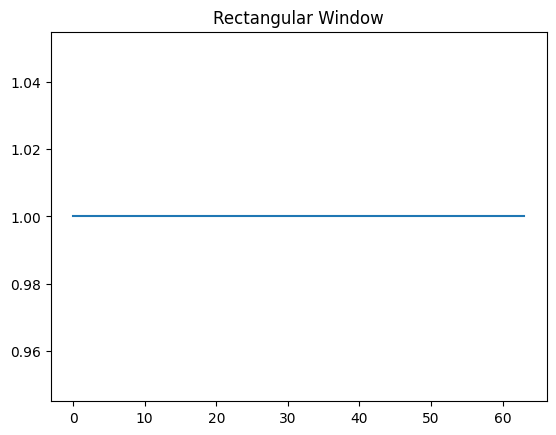

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window(N):
    return np.ones(N)

# Example usage
N = 64
rect_window = rectangular_window(N)
plt.plot(rect_window)
plt.title('Rectangular Window')
plt.show()


**2. Hanning Window:**

The Hanning window is designed to smoothly taper the signal to zero at its ends, reducing spectral leakage.
The window function is given by
w[n]=0.5−0.5cos(2πn/N-1), where
N is the window size.
It provides a balance between main lobe width and sidelobe suppression.

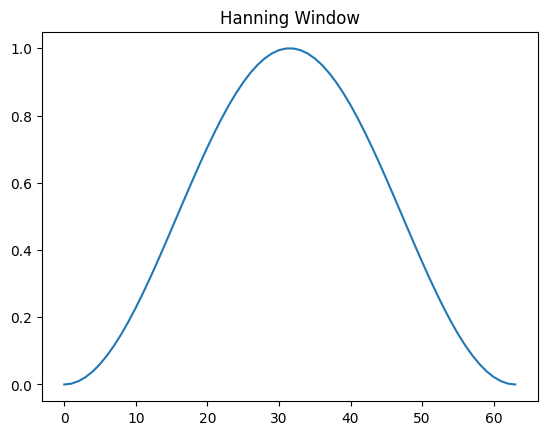

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hanning_window(N):
    return 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Example usage
N = 64
hanning_window = hanning_window(N)
plt.plot(hanning_window)
plt.title('Hanning Window')
plt.show()


**3. Hamming Window:**

Similar to the Hanning window, the Hamming window tapers the signal smoothly, but with slightly different characteristics.
The window function is defined as
w[n]=0.54−0.46cos(2πn/N-1), where
N is the window size.
The Hamming window has a wider main lobe compared to the Hanning window.

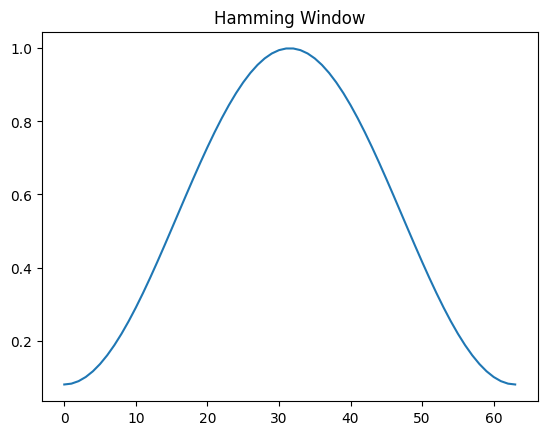

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Example usage
N = 64
hamming_window = hamming_window(N)
plt.plot(hamming_window)
plt.title('Hamming Window')
plt.show()


**4.Blackman Window:**
The Blackman window is designed to provide better suppression of sidelobes compared to Hanning or Hamming.
The window function is given by
w[n]=0.42−0.5cos(2πn/N-1)+0.08cos(4πn/N-1), where
N is the window size.
It has a wider main lobe compared to Hanning or Hamming but better sidelobe suppression.

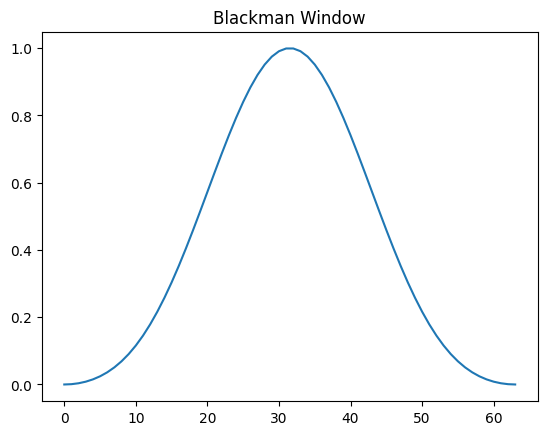

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def blackman_window(N):
    return 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1)) + 0.08 * np.cos(4 * np.pi * np.arange(N) / (N - 1))

# Example usage
N = 64
blackman_window = blackman_window(N)
plt.plot(blackman_window)
plt.title('Blackman Window')
plt.show()


**5. Kaiser Window:**

The Kaiser window is a flexible window with a shape parameter that allows adjustment of the trade-off between main lobe width and sidelobe suppression.
The window function is given by

N is the window size
β is the shape parameter.
Adjusting the shape parameter
β allows you to control the trade-off between the main lobe width and sidelobe suppression. A higher
β results in a narrower main lobe and better sidelobe suppression.

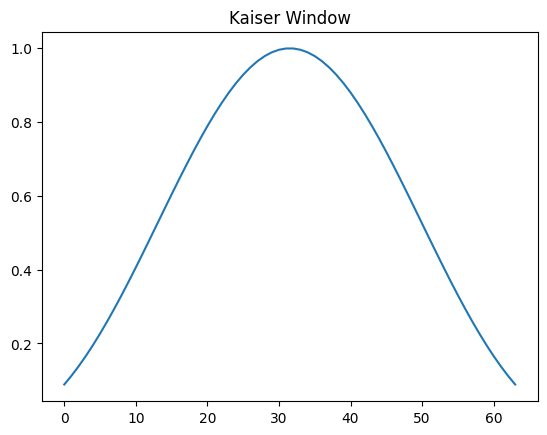

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0

def kaiser_window(N, beta):
    n = np.arange(N) - (N - 1) / 2
    return i0(beta * np.sqrt(1 - (n / ((N - 1) / 2))**2)) / i0(beta)

# Example usage
N = 64
beta = 4.0  # Shape parameter
kaiser_window = kaiser_window(N, beta)
plt.plot(kaiser_window)
plt.title('Kaiser Window')
plt.show()



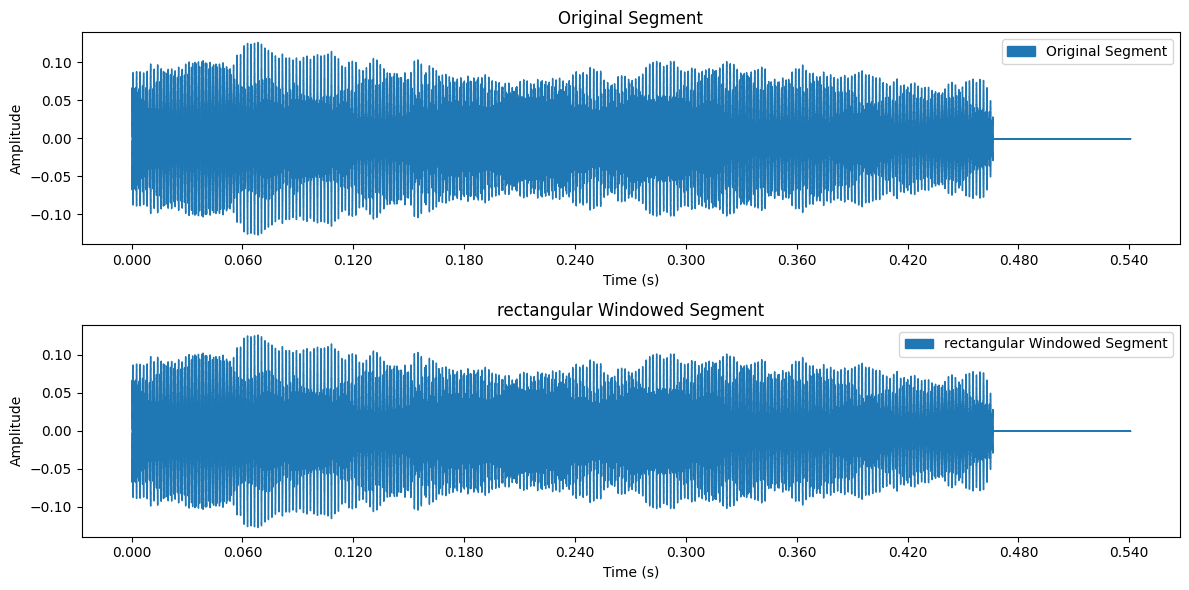

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'rectangular'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

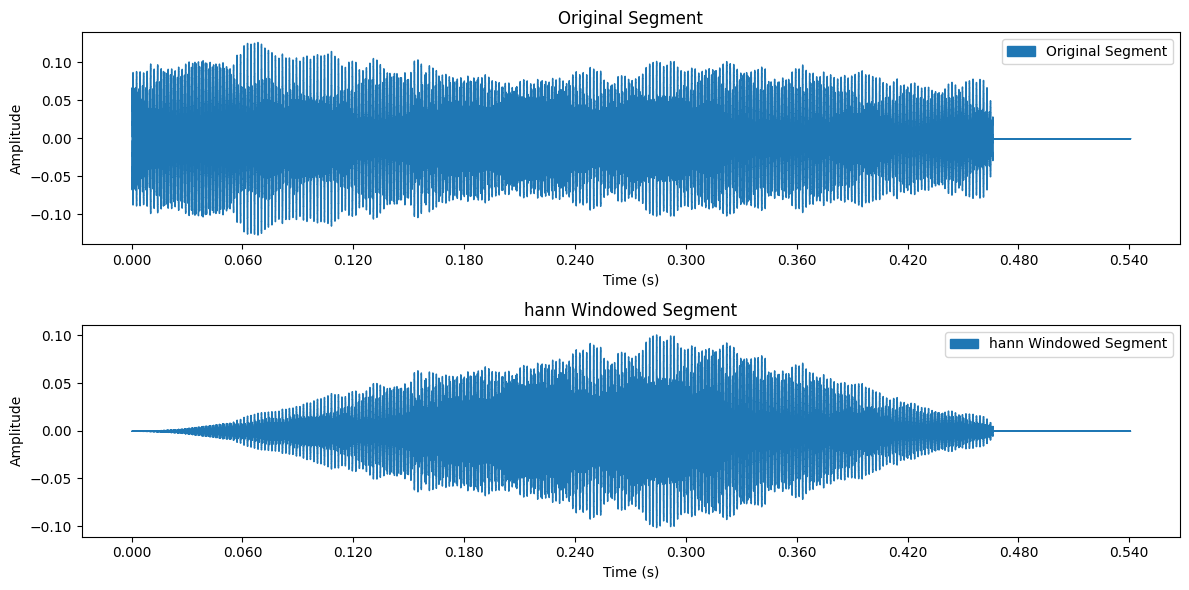

In [ ]:
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'hann'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

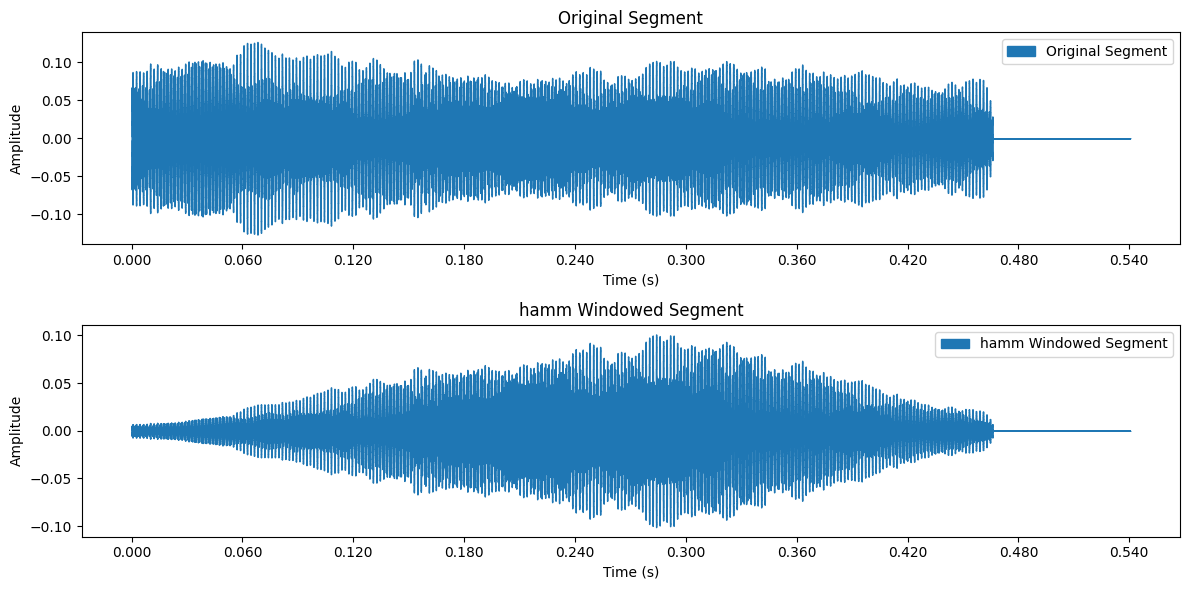

In [18]:
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'hamm'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

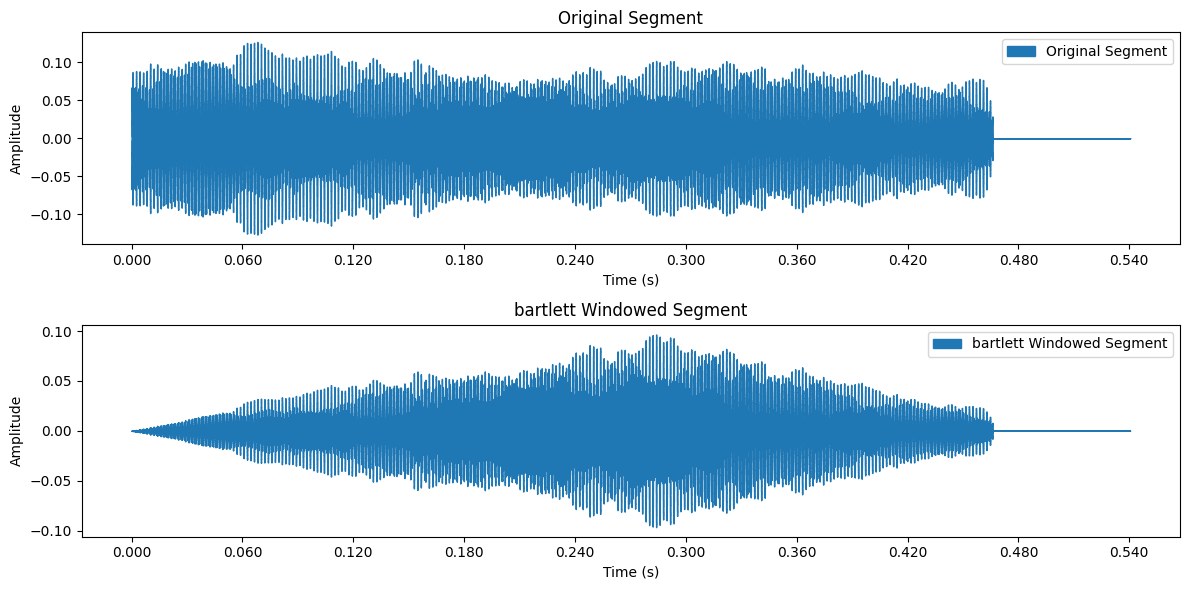

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'bartlett'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
pip install essentia

In [20]:
from essentia.standard import Windowing
from scipy import signal

w_essentia = Windowing(type='hann')  # specify window function in essentia
w_scipy = signal.get_window('triang', 7)  # apply window function in scipy
w_librosa = signal.get_window('hamm', 7)  # apply window function in librosa

In [21]:
w_essentia

<essentia.standard._create_essentia_class.<locals>.Algo at 0x7b588622dc80>

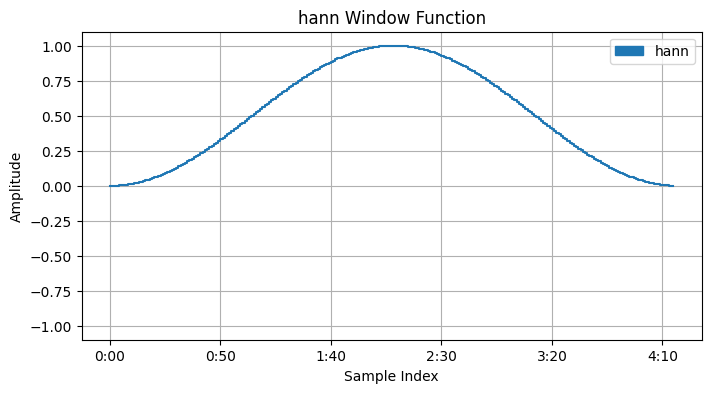

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'hann'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


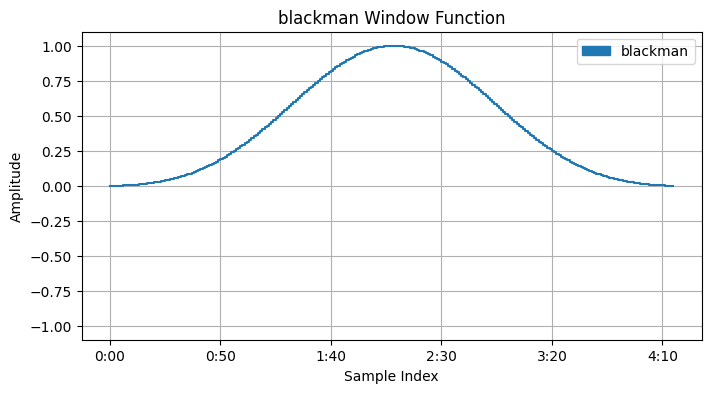

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'blackman'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

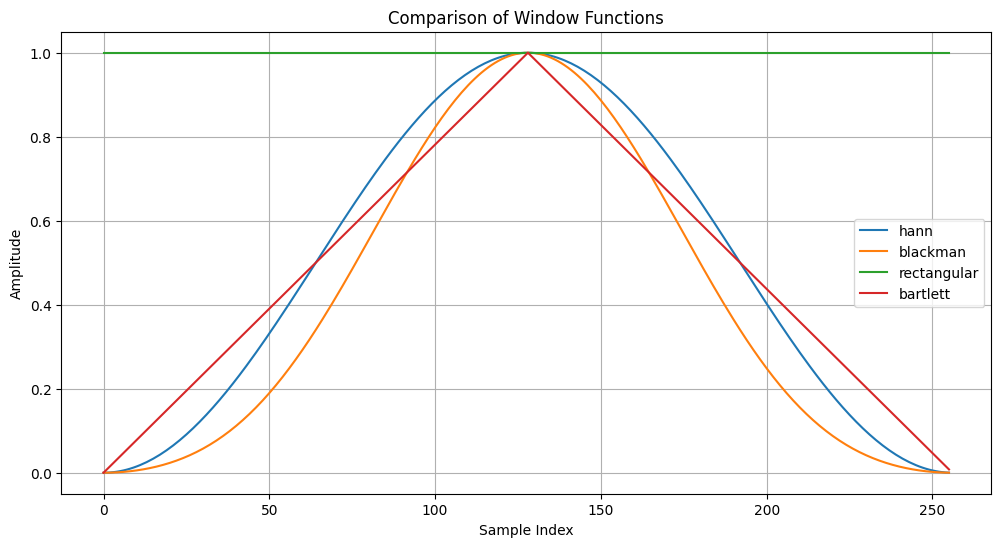

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_types = ['hann', 'blackman','rectangular','bartlett']  # Choose the window functions

# Generate x-axis values (sample indices)
x = np.arange(window_length)

# Plot the window functions
plt.figure(figsize=(12, 6))
for window_type in window_types:
    window = signal.get_window(window_type, window_length)
    plt.plot(x, window, label=window_type)

plt.title('Comparison of Window Functions')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()